# Quantum search for a pattern on an unstructured input vector
Author: Asish Kumar Mandoi, Junior Undergraduate at IIT Kanpur majoring in Electrical Engineering

## Problem Statement
Design a quantum circuit that considers as input the following vector of integers numbers:
<br>
[1,5,7,10]
<br>
returns a quantum state which is a superposition of indices of the target solution, obtaining in the output the indices of the inputs where two adjacent bits will always have different values.

In this case the output should be: $\frac{|01\rangle + |11\rangle}{\sqrt{2}}$, as the correct indices are 1 and 3.
<br>
1 = 0001
<br>
5 = 0101
<br>
7 = 0111
<br>
10 = 1010
<br>
The method to follow for this task is to start from an array of integers as input, pass them to a binary representation and you need to find those integers whose binary representation is such that two adjacent bits are different. Once you have found those integers, you must output a superposition of states where each state is a binary representation of the indices of those integers.

## Quirk simulator circuit
- for [[1, 5, 7, 10]](https://algassert.com/quirk#circuit=%7B%22cols%22:%5B%5B%22H%22,%22H%22,%22H%22%5D,%5B%22%E2%97%A6%22,%22%E2%97%A6%22,%22%E2%97%A6%22,1,1,1,%22X%22%5D,%5B%22%E2%97%A6%22,%22%E2%97%A6%22,%22%E2%80%A2%22,1,%22X%22,1,%22X%22%5D,%5B%22%E2%97%A6%22,%22%E2%80%A2%22,%22%E2%97%A6%22,1,%22X%22,%22X%22,%22X%22%5D,%5B%22%E2%97%A6%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22,1,%22X%22%5D,%5B1,1,1,%22%E2%80%A2%22,1,1,1,%22X%22%5D,%5B1,1,1,1,%22%E2%80%A2%22,1,1,1,%22X%22%5D,%5B1,1,1,1,1,%22%E2%80%A2%22,1,1,1,%22X%22%5D,%5B1,1,1,1,1,1,%22%E2%80%A2%22,1,1,1,%22X%22%5D,%5B1,1,1,1,1,1,1,%22%E2%97%A6%22,%22%E2%97%A6%22,%22%E2%97%A6%22,%22%E2%97%A6%22,%22X%22%5D,%5B1,1,1,1,1,1,1,%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22%5D,%5B1,1,1,%22%E2%80%A2%22,1,1,1,%22X%22%5D,%5B1,1,1,1,%22%E2%80%A2%22,1,1,1,%22X%22%5D,%5B1,1,1,1,1,%22%E2%80%A2%22,1,1,1,%22X%22%5D,%5B1,1,1,1,1,1,%22%E2%80%A2%22,1,1,1,%22X%22%5D,%5B%22%E2%97%A6%22,%22%E2%97%A6%22,%22%E2%97%A6%22,1,1,1,%22X%22%5D,%5B%22%E2%97%A6%22,%22%E2%97%A6%22,%22%E2%80%A2%22,1,%22X%22,1,%22X%22%5D,%5B%22%E2%97%A6%22,%22%E2%80%A2%22,%22%E2%97%A6%22,1,%22X%22,%22X%22,%22X%22%5D,%5B%22%E2%97%A6%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22,1,%22X%22%5D,%5B%22H%22,%22H%22,%22H%22,1,1,1,1,1,1,1,1,%22H%22%5D,%5B%22X%22,%22X%22,%22X%22%5D,%5B%22%E2%80%A2%22,1,%22Z%22%5D,%5B%22X%22,%22X%22,%22X%22%5D,%5B%22H%22,%22H%22,%22H%22,1,1,1,1,%22X%22,1,%22X%22,1,%22X%22%5D%5D,%22init%22:%5B0,0,0,0,0,0,0,1,0,1,0,%22-%22%5D%7D)

In [ ]:
import numpy as np
from math import pi, sqrt, ceil, floor, log
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
%pip install qiskit
%pip install pylatexenc
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library.standard_gates import CXGate, MCXGate

In [2]:
# A custom array_to_latex function
def arr2latex(data, label):
    prefix='\\left|\\psi\\right\\rangle_{{{}}}='.format(label)
    return array_to_latex(np.asarray([data]).transpose(), prefix=prefix, max_size=2**(32))

## Input Vector
Size of the input vector needs to be at least 2


In [3]:
# I have checked for the following random inputs, and the algorithm seems to work fine with small errors in some cases

# k = number of indices for which the corresponding values satisfy the conditions, please also mention it along with the input

vector=[1,5,7,10]; k=2
# vector=[1,5,7,4]; k=1
# vector=[11,5,10,10,0,3,5]; k=4
# vector=[1,5,10,10,8,10,5,10]; k=6
# vector=[1,5,10,10]; k=3

- $N =$ length of input vector

- $n = ⌈log_2N⌉$
<br>*(If N is not a power of 2 then it is set to $2^n$ and the input vector is padded with 0s in its end)*<br>

- $m =$ minimum length of bitstring of the largest number in the input

- $M = 2^m$

In [4]:
# n = mimimum number of quibits required to store the addresses of the input
n=ceil(log(len(vector), 2))

# If the length of the initial vector is not a power of 2, pad zeroes to its end until its length becomes a power of 2
vector=np.asarray(vector, dtype=int)
vector=np.pad(vector, (0, 2**n-len(vector)))

# Making the size of the vector twice by padding zeroes, this will make sure than the number
# of marked states (later in the circuit) doesn't exceed the number of unmarked states
vector=np.pad(vector, (0, 2**n))
n=n+1

# m = minimum number of bits required to store the largest number in the input,
# m is also the minimum number of qubits required to store all the numbers in the input
m=len('{0:b}'.format(max(vector)))

vectorbit=[]
for num in vector:
    vectorbit.append('{0:0{size}b}'.format(num, size=m))
print(vectorbit)

['0001', '0101', '0111', '1010', '0000', '0000', '0000', '0000']


## Solutions to the problem, given 'n' and 'm'

In [5]:
### Numbers that match the given pattern
# For a given m>0, only 2 numbers follow the given pattern (always) - sol_0 and sol_1

sol_0=0
for i in range(0, m, 2):
    sol_0 ^= 2**i

sol_1=(2**m - 1) ^ sol_0

if(sol_0 > sol_1):
    sol_0, sol_1 = sol_1, sol_0

print(sol_0, '->', '{0:0{size}b}'.format(sol_0, size=m))
print(sol_1, '->', '{0:0{size}b}'.format(sol_1, size=m))

5 -> 0101
10 -> 1010


In [6]:
# Function that returns the qubit representation or the statevector representation of a given number
# (Also displays the statevector in latex as well as in bloch sphere)
def num2sv(num, label):
    sv=Statevector.from_label('{0:0{size}b}'.format(num, size=m))
    display(arr2latex(sv.data, '{}'.format(label)))
    
    # reverse_qargs() - to reverse the order of qubits (to see the result in big-endian convention)
    display(plot_bloch_multivector(sv.reverse_qargs()))
    return sv

<IPython.core.display.Latex object>

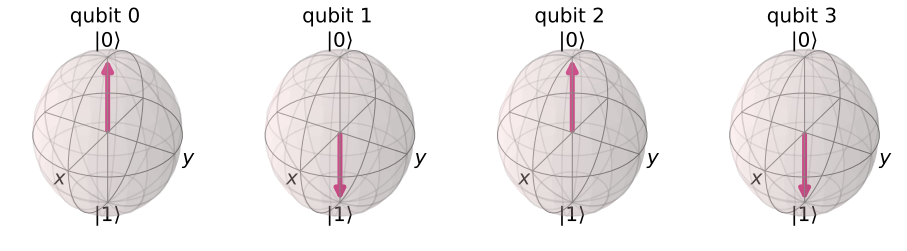

<IPython.core.display.Latex object>

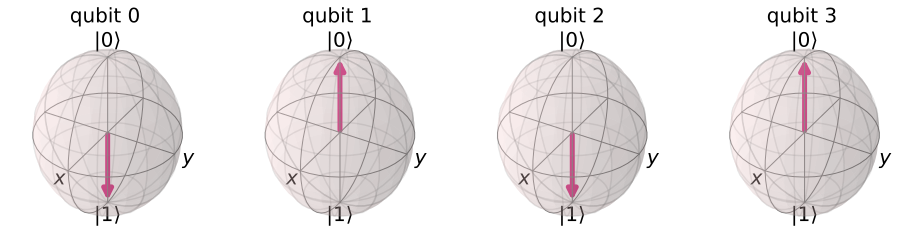

In [7]:
num2sv(sol_0, 'sol_0');
print()
num2sv(sol_1, 'sol_1');

## Qubit registers for the circuit

In [8]:
# 4 qubit registers (assumed to be part of the CPU)
a=QuantumRegister(n, 'a')                               # address
d=QuantumRegister(m, 'd')                               # data
s=QuantumRegister(m, 's')                               # number (or superposition of numbers) to be searched
anc=QuantumRegister(1, 'ancilla')                       # an ancilla qubit

## Input Loading
- Involved hours and hours of research
- According to my research, it can be done in many ways
    - `Classical Loading`
    - `Quantum Loading`
<br>
(Each of which can be implemented in further different ways)

- Whichever method we chose ig there is always a cost involved.
- I have done this part in a `Quantum Loading Scheme`. However, this requires the number of gates of the order $O(N)$ and the number of qubits of the order $O(logN)$.

In [9]:
# Overall complexity O(m*2^n)                          (Try to find other ways)
def load_inputs(qc):                                   # An algorthm to load the given classical data into the ∣d⟩ (data) quibits
    for i in range(2**n):
        gate_dict={'0': 'I', '1': 'X'}
        gate_name = '-'.join([gate_dict[b] for b in vectorbit[i]])
        gate_name = '|{}⟩: '.format(vector[i]) + gate_name
        circ = QuantumCircuit(m, name=gate_name)
        for j in range(m):
            if vectorbit[i][j]=='1':
                circ.x(j)
        
        # multi-x gate
        mx_gate = circ.to_gate()

        # multi-polarity multi-control multi-x gate
        mpmcmx_gate = mx_gate.control(n, ctrl_state='{0:0{size}b}'.format(i, size=n)[::-1])
        qc.append(mpmcmx_gate, range(m+n))
    # print(qc.decompose().decompose().draw())

def unload_inputs(qc):
    load_inputs(qc)

## Initializing the qubits
- Initially, the address register ($\left|a\right\rangle$) needs to be in an equal superposition of all indices from 1 to n
- We need to provide a state that is to be searched into the $\left|s\right\rangle$ register
- The ancilla qubit ($\left|anc\right\rangle$) needs to be initialized to the $\left|-\right\rangle$ state

In [10]:
def initialize(qc):
    # Superpose all indices with equal weights throughout the address register
    qc.h(a)

    # Input the state to be searched into the s register
    for i in range(0, m, 2):
        qc.x(s[i])
    
    # ancilla qubit is set to ∣-⟩ state i.e. (∣0⟩-∣1⟩)/sqrt(2)
    qc.x(anc)
    qc.h(anc)

## Marking the states
- The `oracle` checks if the values of the data qubits are
    1. exaclty same as the number we are searching for
    
    or
    
    2. the exact bitwise complement of the number we are searching for.
- The two markers (`mark_0` and `mark_1`) bring a -ve phase when a number is found in the oracle
    *(It can be proven that both `mark_0` and `mark_1` cannot bring a -ve phase at a time)*

In [11]:
# Overall complexity O(m)
def oracle(qc):
    for i in range(m):
        qc.cx(d[i], s[i])

def inv_oracle(qc):
    oracle(qc)

In [12]:
# Marks the states which are exactly the same as |s⟩ (e.g. |s⟩ = |1010⟩, |state_to_be_marked⟩ = |1010⟩)
def mark_0(qc):
    macx=MCXGate(num_ctrl_qubits=m, ctrl_state='{0:0{size}}'.format(0, size=m))
    qc.append(macx, range(m+n, 2*m+n+1))

In [13]:
# Marks the states which are the bitwise complement of |s⟩ (e.g. |s⟩ = |1010⟩, |state_to_be_marked⟩ = |0101⟩)
def mark_1(qc):
    qc.mct(s, anc)

## Diffuser (a.k.a Amplitude Amplifier)
The diffuser simply takes all the states and tries to amplify the amplitude of the marked state(s) over a number of iterations. by reflecting the current state $\left|a\right\rangle$ of indices about the state of uniform superposition $\left|a_{s}\right\rangle$ of all the indices

In [14]:
def diffuser(qc):
    zero=np.zeros(2**n)
    zero[0]=1
    matrix=2*np.outer(zero, zero)-np.identity(2**n)

    qc.h(a)
    qc.unitary(Operator(matrix).reverse_qargs(), a)
    qc.h(a)

## Resetting Qubits
Resetting the qubits other than the address qubits to the $\left|0\right\rangle$ state helps in `exclusively retrieving the address qubits`

**Please note here that this reset operation is actually a series of `unitary operations` (and hence reversible) unlike the reset operation for QuantumCircuits provided by Qiskit**

In [15]:
def reset_s_anc(qc):
    for i in range(0, m, 2):
        qc.x(s[i])
    qc.h(anc)
    qc.x(anc)

In [16]:
def search():
    qc=QuantumCircuit(a, d, s, anc)                             # quantum circuit consisting of all qubit registers

    initialize(qc)
    
    # Grover iterations: should be iterated ~sqrt(n/k) times
    for i in range(ceil(sqrt(2**n/float(k)))-1):
        load_inputs(qc)
        oracle(qc)
        mark_0(qc)
        mark_1(qc)
        inv_oracle(qc)
        
        unload_inputs(qc)
        diffuser(qc)
    
    reset_s_anc(qc)

    return qc

## The Circuit and the Result
Since we had taken an additional qubit to make sure that Grover's algorithm doesn't encounter more marked states than unmarked states, we are getting an additional qubit $\left|0\right\rangle$ in the beginning in bloch sphere.

As of the statevector $\left|\psi\right\rangle_{idx}$, it gives the amplitudes of the basis states as expected.

For e.g. - $[0, \frac{1}{\sqrt2}, 0, \frac{1}{\sqrt2}, 0, 0, 0, 0] \equiv \frac{\left|001\right\rangle+\left|011\right\rangle}{\sqrt2}$

<IPython.core.display.Latex object>

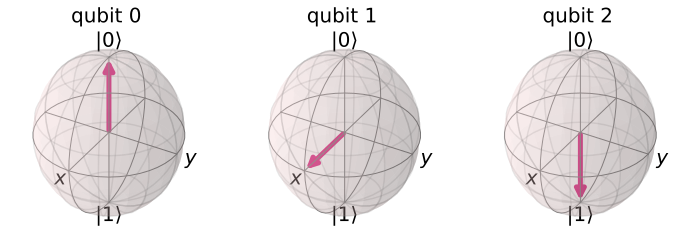

In [17]:
circ=search()

# display(circ.draw(output='mpl'))
print()

idx_sv = Statevector.from_instruction(circ)

idx_sv = Statevector(idx_sv.data[:2**n])
display(arr2latex(idx_sv.reverse_qargs().data, 'idx'))

display(plot_bloch_multivector(idx_sv))

## For testing purposes

In [18]:
# # Testing

# ######## Qiskit is Little Endian.
# ######## For e.g. if we want to initailize first three qubits to '10',
# ######## the initialization unitary will initialize qubit_0 to 0, qubit_1 to 0

# vec=[1,3,7,2,0,5,6,4]
# # vec=[2,2,0,2,2,2,1,0]

# n=ceil(log(len(vec), 2))
# m=len('{0:b}'.format(max(vec)))

# vecbit=[]
# for num in vec:
#     vecbit.append('{0:0{size}b}'.format(num, size=m))
# print(vecbit)

# # 4 qubit registers (assumed to be part of the CPU)
# a=QuantumRegister(n, 'a')                               # address
# d=QuantumRegister(m, 'd')                               # data

# qcir=QuantumCircuit(a, d)

# # init_state=Statevector.from_label('011')

# # # reverse_qargs() - to reverse the order of qubits (to see the result in big-endian convention)
# # qcir.initialize(init_state.reverse_qargs().data, range(n))

# qcir.h(a)

# for i in range(2**n):
#     circ = QuantumCircuit(m, name='Custom X for {}'.format(vec[i]))
#     for j in range(m):
#         if vecbit[i][j]=='1':
#             circ.x(j)
#     xs_gate = circ.to_gate()
#     cxs_gate = xs_gate.control(n, ctrl_state='{0:0{size}b}'.format(i, size=n)[::-1])
#     qcir.append(cxs_gate, range(m+n))

# state_2=Statevector(np.zeros(2**(m+n)))
# for i in range(2**n):
#     state_i=Statevector.from_label('{0:0{size}b}'.format(i,size=n)+'{0:0{size}b}'.format(vec[i],size=m))
#     state_2=state_2+state_i

# state_2 = state_2 / np.linalg.norm(state_2)

# display(qcir.draw(output='mpl'))
# state = Statevector.from_instruction(qcir)

# display(array_to_latex(state.reverse_qargs().data, prefix="|\\psi_1\\rangle_{final}=", max_size=2**(n+2*m+1)))
# display(array_to_latex(state_2.data, prefix="|\\psi_2\\rangle_{final}=", max_size=2**(n+2*m+1)))
# print()
# display(plot_bloch_multivector(state))
# print()
# display(plot_bloch_multivector(state_2.reverse_qargs()))

In [19]:
# backend = BasicAer.get_backend('qasm_simulator')

# circ.measure(a, c)
# counts = execute(circ, backend).result().get_counts()

# # Probablity Distribution of Final Index State
# display(plot_histogram(counts_0, title="Final Index State Probabilities"))

In [20]:
# backend = BasicAer.get_backend('statevector_simulator')
# job = backend.run(transpile(cir, backend))
# cir_state = job.result().get_statevector(cir)